In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install opencv-python 

Note: you may need to restart the kernel to use updated packages.


## Test with 1 picture
I decide to try with text-based watermark first, use cat_37

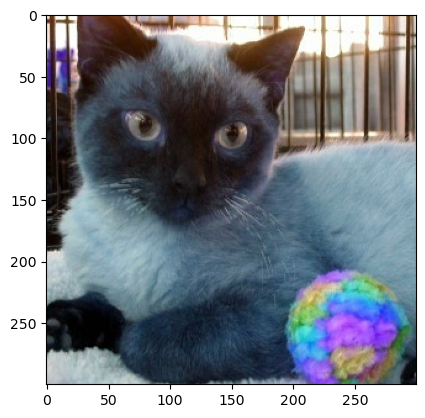

In [4]:
import cv2
import numpy as np

# Load the image
img = cv2.imread(r'C:\Users\tobeo\Desktop\cat-50\cat.1.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [5]:
blank_img = np.zeros((RGB_img.shape[0], RGB_img.shape[1], 3), dtype=np.uint8) # Create an empty image with this size, which is 300 * 300 here
font = cv2.FONT_HERSHEY_PLAIN  # This can be adjusted to a thinner font, I just find this one fine

cv2.putText(blank_img, text='EN.553.493', org=(50, 150), fontFace=font, fontScale=1.4, 
            color=(255, 255, 255), thickness=2, lineType=cv2.LINE_4)  # color white
blended = cv2.addWeighted(src1=RGB_img, alpha=0.7, src2=blank_img, beta=1, gamma=2)

cv2.imshow("Watermarked Image", blended)

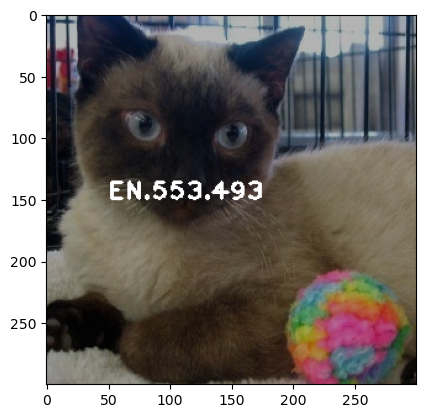

In [5]:
plt.imshow(blended)
plt.show()
# Works for one

In [6]:
# Summarize above as a function
def addWatermark(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Image is none. ")
        return
    
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # sometimes needed
    
    blank_img = np.zeros((RGB_img.shape[0], RGB_img.shape[1], 3), dtype=np.uint8)
    font = cv2.FONT_HERSHEY_PLAIN
    cv2.putText(blank_img, text='EN.553.493', org=(40, 90), fontFace=font, fontScale=1.4, 
                color=(255, 255, 255), thickness=2, lineType=cv2.LINE_4)
    
    blended = cv2.addWeighted(src1=RGB_img, alpha=0.5, src2=blank_img, beta=1, gamma=2)
    # cv2.imwrite(output_path, cv2.cvtColor(blended, cv2.COLOR_RGB2BGR))
    
    plt.imshow(blended)
    # plt.axis('off')
    # plt.show()

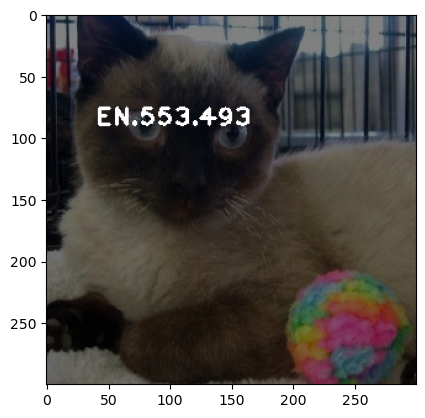

In [7]:
addWatermark(r'C:\Users\tobeo\Desktop\cat-50\cat.1.jpg') # works! 

## This is function for add watermark and save it into dir
Note that this also changes the image into grayscale...

In [8]:
# Saves instead of display
def addWatermarkAndSave(image_path, output_path, name):
    img = cv2.imread(image_path)
    if img is None:
        print("Image is none. ")
        return
    
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # sometimes needed
    
    blank_img = np.zeros((RGB_img.shape[0], RGB_img.shape[1], 3), dtype=np.uint8)
    font = cv2.FONT_HERSHEY_PLAIN
    cv2.putText(blank_img, text='EN.553.493', org=(40, 90), fontFace=font, fontScale=1.4, 
                color=(255, 255, 255), thickness=2, lineType=cv2.LINE_4)
    
    blended = cv2.addWeighted(src1=RGB_img, alpha=0.5, src2=blank_img, beta=1, gamma=2)
    gray_img = cv2.cvtColor(blended, cv2.COLOR_RGB2GRAY)

    os.chdir(output_path)
    print("Before saving image:")   
    print(os.listdir(output_path))   
    filename = name
    cv2.imwrite(filename, gray_img) 
 
    print("After saving image:")   
    print(os.listdir(output_path)) 
  
    print('Successfully saved') 
    print("Saved grayscale watermarked image to:", output_path)
    # Format finds from https://www.geeksforgeeks.org/python-opencv-cv2-imwrite-method/

In [9]:
import os

In [10]:
addWatermarkAndSave(r'C:\Users\tobeo\Desktop\cat-50\cat.1.jpg', r'C:\Users\tobeo\Desktop\test', 'test1.jpg') # works! 

Before saving image:
['cat.1.jpg', 'cat.10.jpg', 'cat.11.jpg', 'cat.12.jpg', 'cat.13.jpg', 'cat.14.jpg', 'cat.15.jpg', 'cat.16.jpg', 'cat.17.jpg', 'cat.18.jpg', 'cat.19.jpg', 'cat.2.jpg', 'cat.20.jpg', 'cat.21.jpg', 'cat.22.jpg', 'cat.23.jpg', 'cat.24.jpg', 'cat.25.jpg', 'cat.26.jpg', 'cat.27.jpg', 'cat.28.jpg', 'cat.29.jpg', 'cat.3.jpg', 'cat.30.jpg', 'cat.31.jpg', 'cat.32.jpg', 'cat.33.jpg', 'cat.34.jpg', 'cat.35.jpg', 'cat.36.jpg', 'cat.37.jpg', 'cat.38.jpg', 'cat.39.jpg', 'cat.4.jpg', 'cat.40.jpg', 'cat.41.jpg', 'cat.42.jpg', 'cat.43.jpg', 'cat.44.jpg', 'cat.45.jpg', 'cat.46.jpg', 'cat.47.jpg', 'cat.48.jpg', 'cat.49.jpg', 'cat.5.jpg', 'cat.50.jpg', 'cat.6.jpg', 'cat.7.jpg', 'cat.8.jpg', 'cat.9.jpg']
After saving image:
['cat.1.jpg', 'cat.10.jpg', 'cat.11.jpg', 'cat.12.jpg', 'cat.13.jpg', 'cat.14.jpg', 'cat.15.jpg', 'cat.16.jpg', 'cat.17.jpg', 'cat.18.jpg', 'cat.19.jpg', 'cat.2.jpg', 'cat.20.jpg', 'cat.21.jpg', 'cat.22.jpg', 'cat.23.jpg', 'cat.24.jpg', 'cat.25.jpg', 'cat.26.jpg', 'c

In [11]:
import os

In [12]:
input_path = r'C:\Users\tobeo\Desktop\cat-50'
output_path = r'C:\Users\tobeo\Desktop\test'

os.listdir(input_path)

['cat.1.jpg',
 'cat.10.jpg',
 'cat.11.jpg',
 'cat.12.jpg',
 'cat.13.jpg',
 'cat.14.jpg',
 'cat.15.jpg',
 'cat.16.jpg',
 'cat.17.jpg',
 'cat.18.jpg',
 'cat.19.jpg',
 'cat.2.jpg',
 'cat.20.jpg',
 'cat.21.jpg',
 'cat.22.jpg',
 'cat.23.jpg',
 'cat.24.jpg',
 'cat.25.jpg',
 'cat.26.jpg',
 'cat.27.jpg',
 'cat.28.jpg',
 'cat.29.jpg',
 'cat.3.jpg',
 'cat.30.jpg',
 'cat.31.jpg',
 'cat.32.jpg',
 'cat.33.jpg',
 'cat.34.jpg',
 'cat.35.jpg',
 'cat.36.jpg',
 'cat.37.jpg',
 'cat.38.jpg',
 'cat.39.jpg',
 'cat.4.jpg',
 'cat.40.jpg',
 'cat.41.jpg',
 'cat.42.jpg',
 'cat.43.jpg',
 'cat.44.jpg',
 'cat.45.jpg',
 'cat.46.jpg',
 'cat.47.jpg',
 'cat.48.jpg',
 'cat.49.jpg',
 'cat.5.jpg',
 'cat.50.jpg',
 'cat.6.jpg',
 'cat.7.jpg',
 'cat.8.jpg',
 'cat.9.jpg']

This is just do the same for all 50 images. This should be applicable to any dataset, just remember to change '.jpg' to other format

In [13]:
limit = 50
count = 0

for filename in os.listdir(input_path): # This is printed
    if filename.lower().endswith('.jpg'):
        if count >= limit:
            break
        image_path = os.path.join(input_path, filename)  
        # print(image_path)
        # C:\Users\tobeo\Desktop\cat-50
        output_final = os.path.join(output_path, filename)
        # print(output_final)
        
        addWatermarkAndSave(image_path, output_path, filename)
        
        count += 1

Before saving image:
['cat.1.jpg', 'cat.10.jpg', 'cat.11.jpg', 'cat.12.jpg', 'cat.13.jpg', 'cat.14.jpg', 'cat.15.jpg', 'cat.16.jpg', 'cat.17.jpg', 'cat.18.jpg', 'cat.19.jpg', 'cat.2.jpg', 'cat.20.jpg', 'cat.21.jpg', 'cat.22.jpg', 'cat.23.jpg', 'cat.24.jpg', 'cat.25.jpg', 'cat.26.jpg', 'cat.27.jpg', 'cat.28.jpg', 'cat.29.jpg', 'cat.3.jpg', 'cat.30.jpg', 'cat.31.jpg', 'cat.32.jpg', 'cat.33.jpg', 'cat.34.jpg', 'cat.35.jpg', 'cat.36.jpg', 'cat.37.jpg', 'cat.38.jpg', 'cat.39.jpg', 'cat.4.jpg', 'cat.40.jpg', 'cat.41.jpg', 'cat.42.jpg', 'cat.43.jpg', 'cat.44.jpg', 'cat.45.jpg', 'cat.46.jpg', 'cat.47.jpg', 'cat.48.jpg', 'cat.49.jpg', 'cat.5.jpg', 'cat.50.jpg', 'cat.6.jpg', 'cat.7.jpg', 'cat.8.jpg', 'cat.9.jpg', 'test1.jpg']
After saving image:
['cat.1.jpg', 'cat.10.jpg', 'cat.11.jpg', 'cat.12.jpg', 'cat.13.jpg', 'cat.14.jpg', 'cat.15.jpg', 'cat.16.jpg', 'cat.17.jpg', 'cat.18.jpg', 'cat.19.jpg', 'cat.2.jpg', 'cat.20.jpg', 'cat.21.jpg', 'cat.22.jpg', 'cat.23.jpg', 'cat.24.jpg', 'cat.25.jpg', 'ca